In [1]:
import matplotlib.pyplot as plt 
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
import pandas as pd
import scipy
import peakutils
import csv


import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats
from sklearn.preprocessing import scale
from collections import Counter
from matplotlib.pyplot import scatter, xlabel, ylabel, savefig

In [2]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
 
df = pd.read_csv('C:\\Users\\TOILET4\\Desktop\\ML\\Project\\opendata_tess_ow.csv')
 


df.head()

C:\Users\TOILET4\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning:

Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.



,YEAR_NUM,MNTH,PROGRAM_NM,OFFICE,FAMILY_TYP_NM,FAMILY_SIZE,AGE,EDUCATION_LEVEL,EARNINGS,IMMIGRATION_STATUS,...,MONTHS_ON_ASSISTANCE,MONTHS_OFF_ASSISTANCE,GENDER,SHELTER_COSTS,YOUNGEST_DEP_AGE_RANGE,WARD_SCODE,CENSUS_NEIGH_SCODE,NEW_CASES,EXITS,CASES
0,2004,20040101,Ontario Works,Application Centre,Families,2,18 to 29 yrs old,High School Incomplete,NaN,Permanent Resident,...,1 to 6 months,1 to 6 months,F,$600 to $999,less than 5 yrs old,2.0,4.0,0,1,1
1,2004,20040101,Ontario Works,Application Centre,Families,2,18 to 29 yrs old,High School Incomplete,NaN,Permanent Resident,...,1 to 6 months,1 to 6 months,F,$400 to $599,less than 5 yrs old,2.0,4.0,0,0,1
2,2004,20040101,Ontario Works,Application Centre,Families,2,18 to 29 yrs old,Post Secondary,NaN,Canadian Citizen,...,1 to 6 months,1 to 6 months,F,$200 to $399,less than 5 yrs old,8.0,24.0,0,0,1
3,2004,20040101,Ontario Works,Application Centre,Families,2,30 to 39 yrs old,High School Complete,Earnings from employment,Canadian Citizen,...,1 to 6 months,7 to 24 months,F,$400 to $599,5 to 10 yrs old,8.0,27.0,0,0,1
4,2004,20040101,Ontario Works,Application Centre,Families,2,30 to 39 yrs old,High School Incomplete,NaN,Canadian Citizen,...,1 to 6 months,1 to 6 months,F,$200 to $399,11 to 15 yrs old,6.0,19.0,0,1,1


In [3]:

df_1=df.replace({'MONTHS_ON_ASSISTANCE':{'7 to 12 months': 9, '1 to 6 months':4, '13 to 24 months':19,
                                           '25 to 60 months':43,'61 to 120 months':91, 'over 120 months':140}, 
                 'AGE':{'50 to 64 yrs old': 58, '30 to 39 yrs old':35, '16 to 17 yrs old':17,
                                           '18 to 29 yrs old':25,'40 to 49 yrs old':45, 
                        '65+ yrs old':70,'Less than 16 yrs old':14},
                'SHELTER_COSTS':{'$600 to $999':800, '$400 to $599':500, '$200 to $399':300, 'Under $200':100, '$1000 to $1399':1200, 
'No shelter costs':0, '$1400 to $1799':1600, 'over $1800':2000},
                'GENDER': {'F':1, 'M':0},
                'TIMES_ON_ASSISTANCE':{'1':1, '2':2, '3':3, '4+':4}})

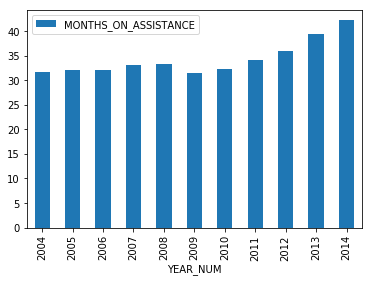

In [4]:
df_2=df_1.groupby('YEAR_NUM')[['MONTHS_ON_ASSISTANCE']].mean()
df_2.plot(kind='bar')

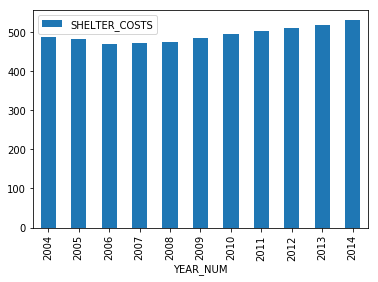

In [5]:
df_3=df_1.groupby('YEAR_NUM')[['SHELTER_COSTS']].mean()
df_3.plot(kind='bar')

In [6]:
Data_2014=df_1[df_1['YEAR_NUM']== 2014]
Data_2014=Data_2014.drop(Data_2014.loc[Data_2014['GENDER']=='U'].index)
Data_2014=Data_2014.drop(Data_2014.loc[Data_2014['EDUCATION_LEVEL']=='Unknown'].index)
Data_2014.head()

,YEAR_NUM,MNTH,PROGRAM_NM,OFFICE,FAMILY_TYP_NM,FAMILY_SIZE,AGE,EDUCATION_LEVEL,EARNINGS,IMMIGRATION_STATUS,...,MONTHS_ON_ASSISTANCE,MONTHS_OFF_ASSISTANCE,GENDER,SHELTER_COSTS,YOUNGEST_DEP_AGE_RANGE,WARD_SCODE,CENSUS_NEIGH_SCODE,NEW_CASES,EXITS,CASES
8730917,2014,20140101,Ontario Works,Application Centre,Families,1,25,High School Incomplete,NaN,Permanent Resident,...,4,25 to 48 months,1,1200,No children,33.0,53.0,0,0,1
8730918,2014,20140101,Ontario Works,Application Centre,Families,2,25,High School Complete,NaN,Canadian Citizen,...,4,7 to 24 months,1,500,5 to 10 yrs old,3.0,9.0,0,0,1
8730919,2014,20140101,Ontario Works,Application Centre,Families,2,25,High School Complete,NaN,Canadian Citizen,...,4,1 to 6 months,1,800,No children,6.0,18.0,0,0,1
8730920,2014,20140101,Ontario Works,Application Centre,Families,2,25,High School Complete,NaN,Canadian Citizen,...,4,1 to 6 months,1,0,No children,8.0,27.0,0,0,1
8730921,2014,20140101,Ontario Works,Application Centre,Families,2,25,High School Complete,NaN,Canadian Citizen,...,4,7 to 24 months,1,1200,less than 5 yrs old,43.0,137.0,0,0,1


In [7]:
Data_2014.columns

Index(['YEAR_NUM', 'MNTH', 'PROGRAM_NM', 'OFFICE', 'FAMILY_TYP_NM',
       'FAMILY_SIZE', 'AGE', 'EDUCATION_LEVEL', 'EARNINGS',
       'IMMIGRATION_STATUS', 'TIMES_ON_ASSISTANCE', 'MONTHS_ON_ASSISTANCE',
       'MONTHS_OFF_ASSISTANCE', 'GENDER', 'SHELTER_COSTS',
       'YOUNGEST_DEP_AGE_RANGE', 'WARD_SCODE', 'CENSUS_NEIGH_SCODE',
       'NEW_CASES', 'EXITS', 'CASES                                    '],
      dtype='object')

In [8]:
Data_2014.shape

(793322, 21)

In [9]:
Data_2014 = Data_2014.reset_index()
Data_2014.index

RangeIndex(start=0, stop=793322, step=1)

In [10]:
Data_2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793322 entries, 0 to 793321
Data columns (total 22 columns):
index                                        793322 non-null int64
YEAR_NUM                                     793322 non-null int64
MNTH                                         793322 non-null int64
PROGRAM_NM                                   793322 non-null object
OFFICE                                       793322 non-null object
FAMILY_TYP_NM                                793322 non-null object
FAMILY_SIZE                                  793322 non-null object
AGE                                          793322 non-null int64
EDUCATION_LEVEL                              793322 non-null object
EARNINGS                                     81067 non-null object
IMMIGRATION_STATUS                           793322 non-null object
TIMES_ON_ASSISTANCE                          793322 non-null int64
MONTHS_ON_ASSISTANCE                         793322 non-null int64
MONTHS_OFF_A

In [11]:
Data_2014.describe()

,index,YEAR_NUM,MNTH,AGE,TIMES_ON_ASSISTANCE,MONTHS_ON_ASSISTANCE,SHELTER_COSTS,WARD_SCODE,CENSUS_NEIGH_SCODE,NEW_CASES,EXITS,CASES
count,7.933220e+05,793322.0,7.933220e+05,793322.000000,793322.000000,793322.000000,793322.000000,791128.000000,791128.000000,793322.000000,793322.000000,793322.000000
mean,9.133630e+06,2014.0,2.014055e+07,39.962462,2.629596,42.081065,530.893887,21.452563,70.392141,0.042685,0.049155,1.074569
std,2.324946e+05,0.0,2.866608e+02,12.480357,1.295955,40.314329,362.333173,13.447429,44.601645,0.242509,0.218397,0.373604
min,8.730917e+06,2014.0,2.014010e+07,14.000000,1.000000,4.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,8.932335e+06,2014.0,2.014030e+07,25.000000,1.000000,9.000000,300.000000,9.000000,27.000000,0.000000,0.000000,1.000000
50%,9.133502e+06,2014.0,2.014050e+07,35.000000,3.000000,19.000000,500.000000,20.000000,72.000000,0.000000,0.000000,1.000000
75%,9.335023e+06,2014.0,2.014080e+07,45.000000,4.000000,91.000000,800.000000,34.000000,115.000000,0.000000,0.000000,1.000000
max,9.536340e+06,2014.0,2.014100e+07,70.000000,4.000000,140.000000,2000.000000,44.000000,140.000000,16.000000,5.000000,21.000000


In [12]:
Data=Data_2014.drop([ 'OFFICE', 'PROGRAM_NM', 'NEW_CASES', 'EXITS',  'CENSUS_NEIGH_SCODE', 'MONTHS_OFF_ASSISTANCE','WARD_SCODE', 'EARNINGS','CASES                                    '] , axis = 1)        

In [13]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793322 entries, 0 to 793321
Data columns (total 13 columns):
index                     793322 non-null int64
YEAR_NUM                  793322 non-null int64
MNTH                      793322 non-null int64
FAMILY_TYP_NM             793322 non-null object
FAMILY_SIZE               793322 non-null object
AGE                       793322 non-null int64
EDUCATION_LEVEL           793322 non-null object
IMMIGRATION_STATUS        793322 non-null object
TIMES_ON_ASSISTANCE       793322 non-null int64
MONTHS_ON_ASSISTANCE      793322 non-null int64
GENDER                    793322 non-null object
SHELTER_COSTS             793322 non-null int64
YOUNGEST_DEP_AGE_RANGE    793322 non-null object
dtypes: int64(7), object(6)
memory usage: 78.7+ MB


In [14]:
corr = Data.corr()
corr.style.background_gradient()

C:\Users\TOILET4\Anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning:

invalid value encountered in less



,index,YEAR_NUM,MNTH,AGE,TIMES_ON_ASSISTANCE,MONTHS_ON_ASSISTANCE,SHELTER_COSTS
index,1,nan,0.994991,0.0126665,0.00113558,0.0129857,0.00161236
YEAR_NUM,nan,nan,nan,nan,nan,nan,nan
MNTH,0.994991,nan,1,0.00611299,0.00104366,0.0141761,0.0069492
AGE,0.0126665,nan,0.00611299,1,-0.0108421,0.163009,0.0638746
TIMES_ON_ASSISTANCE,0.00113558,nan,0.00104366,-0.0108421,1,-0.0231005,-0.0364695
MONTHS_ON_ASSISTANCE,0.0129857,nan,0.0141761,0.163009,-0.0231005,1,0.0216139
SHELTER_COSTS,0.00161236,nan,0.0069492,0.0638746,-0.0364695,0.0216139,1


In [15]:
cat_columns = ["FAMILY_TYP_NM", "FAMILY_SIZE", 'EDUCATION_LEVEL', 'IMMIGRATION_STATUS' , 
               'TIMES_ON_ASSISTANCE', 'GENDER','YOUNGEST_DEP_AGE_RANGE']

In [16]:
Data_processed = pd.get_dummies(Data, prefix_sep="__",
                              columns=cat_columns)
Data_processed

,index,YEAR_NUM,MNTH,AGE,MONTHS_ON_ASSISTANCE,SHELTER_COSTS,FAMILY_TYP_NM__Families,FAMILY_TYP_NM__Singles,FAMILY_SIZE__1,FAMILY_SIZE__1,...,TIMES_ON_ASSISTANCE__2,TIMES_ON_ASSISTANCE__3,TIMES_ON_ASSISTANCE__4,GENDER__0,GENDER__1,YOUNGEST_DEP_AGE_RANGE__11 to 15 yrs old,YOUNGEST_DEP_AGE_RANGE__16+ yrs old,YOUNGEST_DEP_AGE_RANGE__5 to 10 yrs old,YOUNGEST_DEP_AGE_RANGE__No children,YOUNGEST_DEP_AGE_RANGE__less than 5 yrs old
0,8730917,2014,20140101,25,4,1200,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
1,8730918,2014,20140101,25,4,500,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,8730919,2014,20140101,25,4,800,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,8730920,2014,20140101,25,4,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,8730921,2014,20140101,25,4,1200,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
5,8730922,2014,20140101,25,4,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
6,8730923,2014,20140101,25,4,800,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
7,8730924,2014,20140101,25,4,800,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
8,8730925,2014,20140101,25,4,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
9,8730926,2014,20140101,25,4,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1


In [17]:
Data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793322 entries, 0 to 793321
Data columns (total 34 columns):
index                                                              793322 non-null int64
YEAR_NUM                                                           793322 non-null int64
MNTH                                                               793322 non-null int64
AGE                                                                793322 non-null int64
MONTHS_ON_ASSISTANCE                                               793322 non-null int64
SHELTER_COSTS                                                      793322 non-null int64
FAMILY_TYP_NM__Families                                            793322 non-null uint8
FAMILY_TYP_NM__Singles                                             793322 non-null uint8
FAMILY_SIZE__1                                                     793322 non-null uint8
FAMILY_SIZE__1                                                     793322 non-null uint8

In [18]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(Data_processed, test_size=0.3, random_state=42)

In [19]:
target = 'MONTHS_ON_ASSISTANCE'
features = list(train_set.columns)
features = [f for f in features if f!=target]

In [20]:
X_tr = train_set[features]
y_tr = train_set[[target]]

X_te = test_set[features]
y_te = test_set[[target]]

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_tr)
X_tr = scaler.transform(X_tr)
X_te = scaler.transform(X_te)

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import numpy as np

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())

In [23]:
from sklearn.linear_model import LinearRegression
lin_scores = cross_val_score(LinearRegression(), train_set[features], train_set[target], scoring="neg_mean_squared_error", cv=4)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [37.30467807 37.28579034 37.27187258 37.33314659]
Mean: 37.29887189352758


In [24]:
X_tr

array([[ 0.55129295,  0.        ,  0.53694357, ..., -0.35142976,
         0.78617754, -0.4386354 ],
       [ 0.23916871,  0.        ,  0.18819226, ..., -0.35142976,
        -1.27197732,  2.27979776],
       [-0.7384872 ,  0.        , -0.85806169, ..., -0.35142976,
         0.78617754, -0.4386354 ],
       ...,
       [-1.15475461,  0.        , -1.206813  , ...,  2.84551887,
        -1.27197732, -0.4386354 ],
       [ 1.19944018,  0.        ,  1.2344462 , ..., -0.35142976,
        -1.27197732,  2.27979776],
       [-1.19799424,  0.        , -1.206813  , ..., -0.35142976,
        -1.27197732,  2.27979776]])

In [25]:
#from sklearn.svm import SVR
#svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
#svr_rbf.fit(X_tr, np.ravel(y_tr))

In [26]:
#from sklearn.svm import SVC
#from sklearn.metrics import accuracy_score

#svm_clf = SVC()
#svm_clf.fit(x, Y)
#y_pred = svm_clf.predict(x)
#accuracy_score(Y, y_pred)

### Whether females are most likely granted by social assiatnce 

C:\Users\TOILET4\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\TOILET4\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\TOILET4\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\TOILET4\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



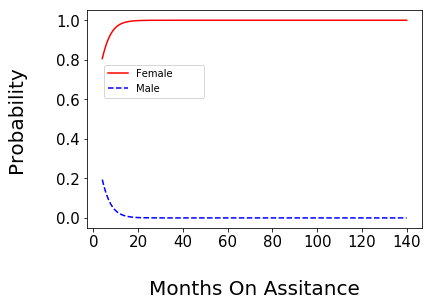

Training Score: 0.5589051456354387
Testing Score: 0.5580238406366467


In [27]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(Data, test_size=0.3, random_state=42)

target = 'GENDER'
features = 'MONTHS_ON_ASSISTANCE'


X_tr = train_set[features]
y_tr = train_set[[target]]

X_te = test_set[features]
y_te = test_set[[target]]


x_tr=X_tr.values
x_tr = np.array(x_tr).reshape((len(x_tr), 1))

x_te=X_te.values
x_te = np.array(x_te).reshape((len(x_te), 1))



from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_tr)
x_tr = scaler.transform(x_tr)
x_te = scaler.transform(x_te)

#  Whether females are most likely granted by social assiatnce 
Y_tr=(y_tr==1) #1 if Female, else 0
Y_te=(y_te==1)


from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_tr,Y_tr)

X_new = np.linspace(4, 140, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)


plt.plot(X_new, y_proba[:,1], "r-", label="F")
plt.plot(X_new, y_proba[:,0], "b--", label="M")
L = plt.legend(bbox_to_anchor=(0.05, 0.75, 0.3, 0), loc=2, 
               ncol=1, mode="expand", borderaxespad=0)
L.get_texts()[0].set_text('Female')
L.get_texts()[1].set_text('Male')
plt.xlabel('Months On Assitance', labelpad=30, size= 20)
plt.ylabel('Probability' , labelpad=30,size = 20)
plt.title('', size = 30)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

y_pred = log_reg.predict_proba(x_tr)

print ('Training Score:',log_reg.score(x_tr, Y_tr) )
print ('Testing Score:',log_reg.score(x_te, Y_te) )

### Whether immigration status has imapct on social assistance

C:\Users\TOILET4\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\TOILET4\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\TOILET4\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\TOILET4\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



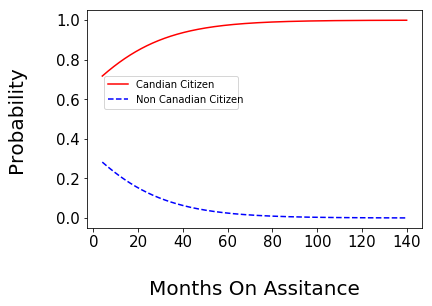

Training Score: 0.6760851753477694
Testing Score: 0.6767186141001778


In [28]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(Data, test_size=0.3, random_state=42)

target = 'IMMIGRATION_STATUS'
features = 'MONTHS_ON_ASSISTANCE'


X_tr = train_set[features]
y_tr = train_set[[target]]

X_te = test_set[features]
y_te = test_set[[target]]

x_tr=X_tr.values
x_tr = np.array(x_tr).reshape((len(x_tr), 1))

x_te=X_te.values
x_te = np.array(x_te).reshape((len(x_te), 1))


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_tr)
x_tr = scaler.transform(x_tr)
x_te = scaler.transform(x_te)

# Canadian citizen have been more on social assistance
Y_tr=(y_tr=='Canadian Citizen') #1 if Canadian, else 0
Y_te=(y_te=='Canadian Citizen')



from sklearn.linear_model import LogisticRegression
log_reg_status = LogisticRegression()
log_reg_status.fit(x_tr,Y_tr)

X_new = np.linspace(4, 140, 1000).reshape(-1, 1)
y_status_proba = log_reg_status.predict_proba(X_new)

plt.plot(X_new, y_status_proba[:,1], "r-", label="Candian Citizen")
plt.plot(X_new, y_status_proba[:,0], "b--", label="Non Canadian Citizen")
L = plt.legend(bbox_to_anchor=(0.05, 0.7, 0.4, 0), loc=2, 
               ncol=1, mode="expand", borderaxespad=0)
L.get_texts()[0].set_text('Candian Citizen')
L.get_texts()[1].set_text('Non Canadian Citizen')
plt.xlabel('Months On Assitance', labelpad=30, size= 20)
plt.ylabel('Probability' , labelpad=30,size = 20)
plt.title('', size = 30)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

print ('Training Score:',log_reg_status.score(x_tr, Y_tr) )
print ('Testing Score:',log_reg_status.score(x_te, Y_te) )

### Whether education level status has imapct on social assistance

C:\Users\TOILET4\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\TOILET4\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\TOILET4\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\TOILET4\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



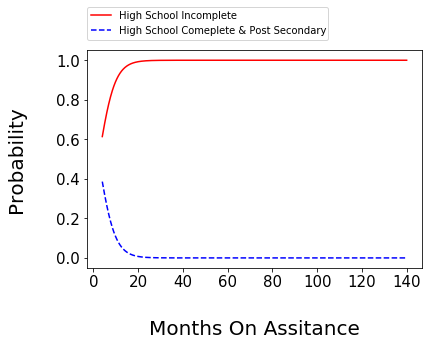

Training Score: 0.6546364741367667
Testing Score: 0.6547855645239226


In [29]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(Data, test_size=0.3, random_state=42)

target = 'EDUCATION_LEVEL'
features = 'MONTHS_ON_ASSISTANCE'


X_tr = train_set[features]
y_tr = train_set[[target]]

X_te = test_set[features]
y_te = test_set[[target]]


x_tr=X_tr.values
x_tr = np.array(x_tr).reshape((len(x_tr), 1))

x_te=X_te.values
x_te = np.array(x_te).reshape((len(x_te), 1))



from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_tr)
x_tr = scaler.transform(x_tr)
x_te = scaler.transform(x_te)

# lower education level have been more on social assistance
Y_tr=(y_tr=='High School Incomplete') #1 if Female, else 0
Y_te=(y_te=='High School Incomplete')

from sklearn.linear_model import LogisticRegression
log_reg_edu = LogisticRegression()
log_reg_edu.fit(x_tr,Y_tr)

X_new = np.linspace(4, 140, 1000).reshape(-1, 1)
y_edu_proba = log_reg_edu.predict_proba(X_new)

plt.plot(X_new, y_edu_proba[:,1], "r-", label="High School Incomplete")
plt.plot(X_new, y_edu_proba[:,0], "b--", label="Others")
L = plt.legend(bbox_to_anchor=(0, 1.2, 0.72, 0), loc=2, 
               ncol=1, mode="expand", borderaxespad=0)
L.get_texts()[0].set_text('High School Incomplete')
L.get_texts()[1].set_text('High School Comeplete & Post Secondary')
plt.xlabel('Months On Assitance', labelpad=30, size= 20)
plt.ylabel('Probability' , labelpad=30,size = 20)
plt.title('', size = 30)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

print ('Training Score:',log_reg_edu.score(x_tr, Y_tr) )
print ('Testing Score:',log_reg_edu.score(x_te, Y_te) )

In [30]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = matplotlib.cm.get_cmap("jet")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=cmap(digit / 9))
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(np.array(neighbors) - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

In [31]:
np.random.seed(42)

m = 20000
idx = np.random.permutation(60000)[:m]

X = Data_2014.index
y = Data_2014['YOUNGEST_DEP_AGE_RANGE'].index


In [32]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(Data_processed)
print(X_reduced.shape)
print(Data_processed.shape)
Data_processed.index

(793322, 1)
(793322, 34)


RangeIndex(start=0, stop=793322, step=1)

### Questions:

1. Can we apply PCA on dummies (hot one encoders) or should be done on major featues not the ones made for categorical variable.

2. 